<a href="https://colab.research.google.com/github/FerdousJUST/Fish-Classification-model-in-cnn-2022__final-/blob/main/SVM_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/Image Dataset/Image_Classification_Dataset/Training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/Image Dataset/Image_Classification_Dataset/Validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

val_set = test_datagen.flow_from_directory('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/Image Dataset/Image_Classification_Dataset/Validation_Fish',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


valid_set = test_datagen.flow_from_directory('/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/Image Dataset/Image_Classification_Dataset/valid_test_data',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [ ]:
DATADIR='/content/drive/MyDrive/MSc Thesis Work 2022(Ferdous)/Image Dataset/Image_Classification_Dataset/Training'
CATEGORIES=['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']

IMG_SIZE=64

In [ ]:
import cv2
import os

training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), 
                                    # cv2.IMREAD_GRAYSCALE
                                     cv2.IMREAD_COLOR
                                     )
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [ ]:
X.shape

(4800, 64, 64, 3)

In [ ]:
train_data_val = X/255

In [ ]:
#train_data = np.array(training_data)

<ipython-input-10-ee5620a0c176>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_data = np.array(training_data)


In [ ]:
#train_data.shape

(4800, 2)

In [ ]:
from sklearn.model_selection import train_test_split
(x_val,y_val)= train_test_split(train_data_val,test_size = 0.25)

In [ ]:
x_val.shape

(3600, 64, 64, 3)

In [ ]:
y_val.shape

(1200, 64, 64, 3)

In [ ]:

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


cnn.add(tf.keras.layers.Flatten())


cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))

#cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

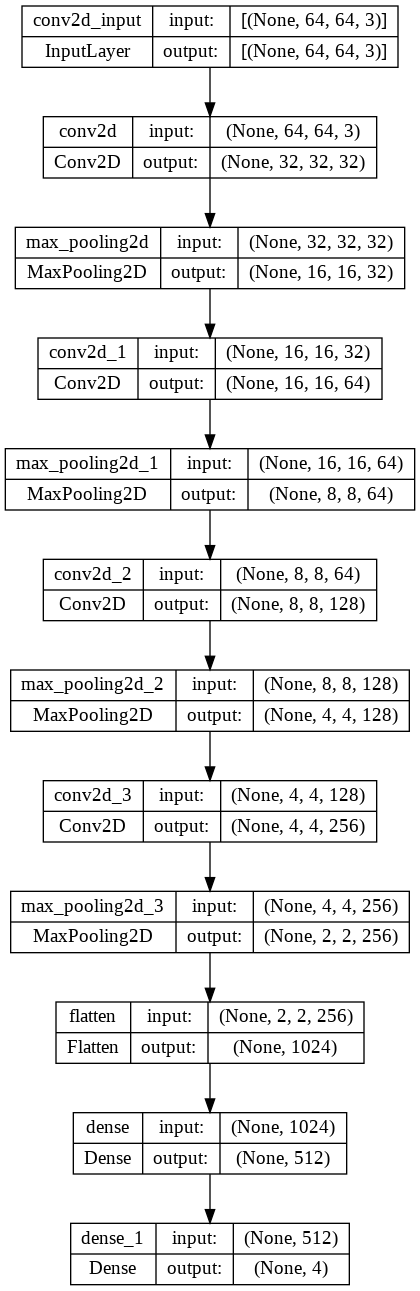

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = cnn,show_shapes = True)

In [ ]:

cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [ ]:
#r=cnn.fit(X, validation_data = (x_val,y_val), epochs = 5)

In [ ]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
150/150 [==============================] - 1214s 8s/step - loss: 1.1854 - accuracy: 0.5200 - val_loss: 1.1919 - val_accuracy: 0.5358
Epoch 2/50
150/150 [==============================] - 68s 450ms/step - loss: 1.0283 - accuracy: 0.7156 - val_loss: 1.0625 - val_accuracy: 0.6700
Epoch 3/50
150/150 [==============================] - 66s 437ms/step - loss: 0.9788 - accuracy: 0.7685 - val_loss: 1.0618 - val_accuracy: 0.6833
Epoch 4/50
150/150 [==============================] - 67s 445ms/step - loss: 0.9360 - accuracy: 0.8188 - val_loss: 0.9906 - val_accuracy: 0.7542
Epoch 5/50
150/150 [==============================] - 66s 440ms/step - loss: 0.9139 - accuracy: 0.8394 - val_loss: 0.9793 - val_accuracy: 0.7658
Epoch 6/50
150/150 [==============================] - 66s 443ms/step - loss: 0.8806 - accuracy: 0.8733 - val_loss: 0.9989 - val_accuracy: 0.7492
Epoch 7/50
150/150 [==============================] - 68s 451ms/step - loss: 0.8730 - accuracy: 0.8821 - val_loss: 0.8974 - val_acc

In [ ]:
acc = cnn.evaluate(test_set,steps = len(test_set),verbose = 2)
print('%.2f'%(acc[1]*100))

38/38 - 10s - loss: 1.0052 - accuracy: 0.7400 - 10s/epoch - 261ms/step
74.00


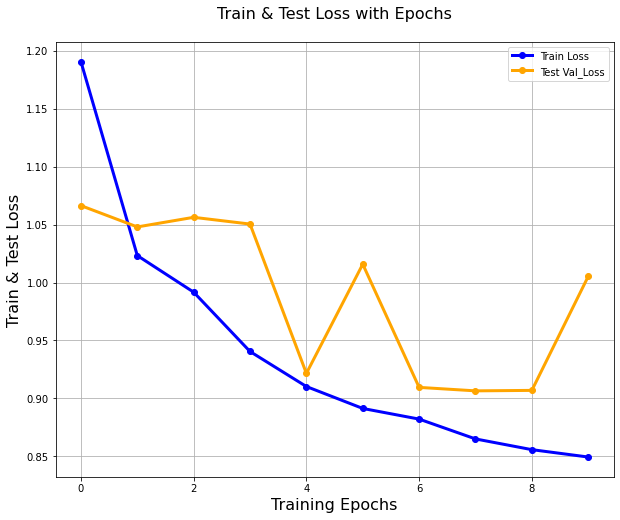

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(r.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(r.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,20)
plt.legend(['Train Loss', 'Test Val_Loss'], loc='upper right')
plt.title("Train & Test Loss with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Loss",fontsize =16)
plt.show()

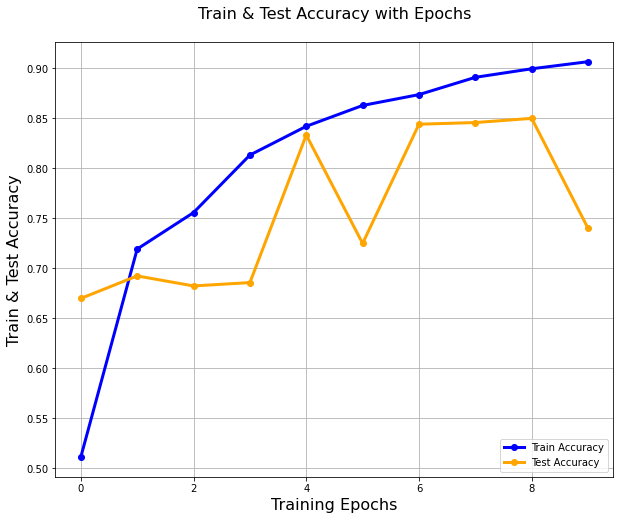

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(r.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(r.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Train & Test Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Accuracy",fontsize =16)
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/hilsha1.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

print(result)

list_index = [0,1,2,3]

x = result

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']

for i in range(4):
  print(classification[list_index[i]], ':', round(result[0][list_index[i]] * 100,2),'%')



  

1/1 [==============================] - 0s 22ms/step
[[6.3887518e-03 9.8921019e-01 4.1128224e-06 4.3970007e-03]]
[1, 0, 3, 2]
Hilsha_Fish : 98.92 %
Barbel_Fish : 0.64 %
Tilapia_Fish : 0.44 %
Spotted_Snakehead_Fish : 0.0 %


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
y_pred = cnn.predict(val_set)

38/38 [==============================] - 589s 16s/step


In [ ]:
y_pred = np.argmax(y_pred,axis = 1)

In [ ]:
y_pred.shape

(1200,)

In [ ]:
#y_val.shape

(1200, 64, 64, 3)

In [ ]:
x_pred = cnn.predict(valid_set)

38/38 [==============================] - 564s 15s/step


In [ ]:
x_pred = np.argmax(x_pred,axis = 1)

In [ ]:
x_pred.shape

(1200,)

In [ ]:
print(classification_report(x_pred,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.43      0.45       577
           1       0.22      0.20      0.21       259
           2       0.17      0.20      0.19       213
           3       0.17      0.20      0.18       151

    accuracy                           0.31      1200
   macro avg       0.26      0.26      0.26      1200
weighted avg       0.32      0.31      0.32      1200



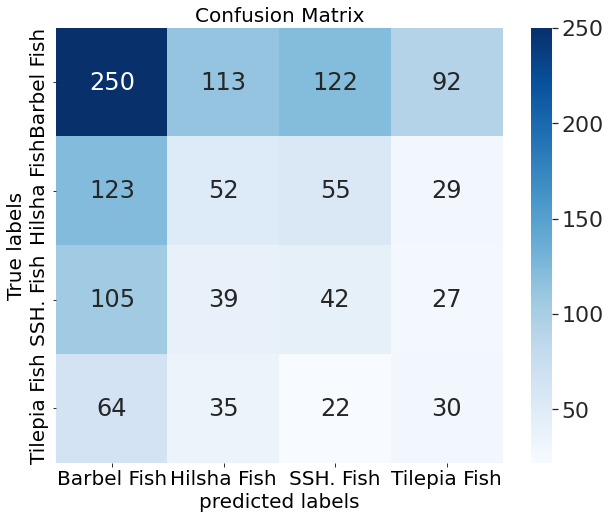

In [ ]:
import seaborn as sns
cm = confusion_matrix(x_pred,y_pred)

plt.figure(figsize=(10,8))
ax = plt.subplot()
sns.set(font_scale = 2.0)
sns.heatmap(cm,annot = True,fmt ='g',cmap = "Blues",ax=ax);

ax.set_xlabel('predicted labels',fontsize = 20);
ax.set_ylabel('True labels',fontsize = 20);
ax.set_title('Confusion Matrix',fontsize = 20);
ax.xaxis.set_ticklabels(['Barbel Fish','Hilsha Fish','SSH. Fish','Tilepia Fish'],fontsize = 20);
ax.yaxis.set_ticklabels(['Barbel Fish','Hilsha Fish','SSH. Fish','Tilepia Fish'],fontsize = 20);

In [ ]:
f1_score(x_pred,y_pred,average = 'macro')

0.25576392826034666

In [ ]:
recall_score(x_pred,y_pred,average = 'weighted')

0.31166666666666665

In [ ]:
precision_score(x_pred,y_pred,average = 'macro')

0.25541025476682655